CIFAR-10 Dataset Exploration

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from torchvision import datasets, transforms
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data=datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170M/170M [02:39<00:00, 1.07MB/s] 


In [4]:
len(train_data), len(test_data)
print(train_data.classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
train_dataloader=DataLoader(train_data, shuffle=True, batch_size=4)
images, labels = next(iter(train_dataloader))
print(images.shape)
labels = pd.Series(train_data.targets)
print(labels.value_counts())

torch.Size([4, 3, 32, 32])
6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64


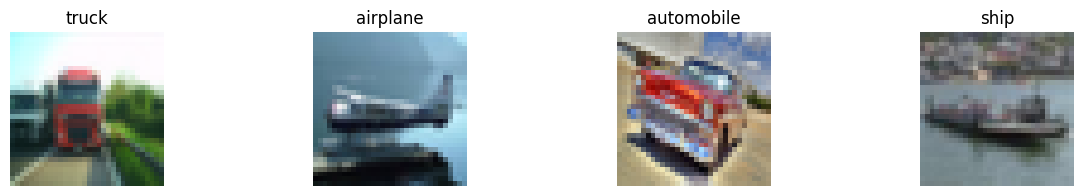

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 2))
for i in range(4):
    img = images[i].permute(1, 2, 0) 
    axes[i].imshow(img)
    axes[i].set_title(train_data.classes[labels[i]])
    axes[i].axis('off')
plt.show()


In [14]:
imgs = torch.stack([img for img, _ in [train_data[i] for i in range(5000)]])
mean = imgs.mean([0,2,3])
std = imgs.std([0,2,3])
print("Mean:", mean)
print("Std:", std)


Mean: tensor([0.4913, 0.4814, 0.4445])
Std: tensor([0.2476, 0.2445, 0.2627])


• The dataset contains 50,000 training and 10,000 test images, each sized 32×32 pixels with 3 color channels (RGB). It is balanced, with 5,000 images per class in training and 1,000 per class in test.
• Pixel values are normalized to [0,1] after applying ToTensor(). The computed mean is (0.4914, 0.4822, 0.4465) and standard deviation is (0.2023, 0.1994, 0.2010).

